In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Combine into a single dataframe
There are two Excel sheets at your disposal. The first one is called OfferInformation which contains information on the offers extended on products. The other sheet is Transactions which contains information on customers' purchase records. Your task will be to load these two sheets as dataframes and then merge them according to a common column present in both sheets. This will enable you to visualize both the offers and transactions data in a single frame.

In [2]:
# Load Offers
offers = pd.read_excel(r'C:\Users\SHRIK\Desktop\shrikant\Projects\GreyAtom Projects\Customer Segmentation\data\cs.xlsx', sheet_name=0)
# Load Transactions
transactions = pd.read_excel(r'C:\Users\SHRIK\Desktop\shrikant\Projects\GreyAtom Projects\Customer Segmentation\data\cs.xlsx', sheet_name=1)
transactions['n'] = 1
# Merge dataframes
df = pd.merge(offers,transactions)
# Look at the first 5 row
df.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


# Create an Offer-Transaction pivot table
Now that you have merged both offers and transactions sheets, time to group this data by Offer # for every customer. This can be done effectively with the help of a pivot table where every observation is indexed by the name of the customer ('Customer Last Name'), columns will represent the offer ID ('Offer #') and the values denote whether the offer was purchased by the customer ('n')

In [3]:
# create pivot table
matrix = df.pivot_table(index='Customer Last Name', columns='Offer #', values='n')

# replace missing values with 0
matrix.fillna(0, inplace=True)

# reindex pivot table
matrix.reset_index(inplace=True)

# display first 5 rows
matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Use Kmeans to cluster data
The management has made a decision to segment customers into 5 categories in order to analyse customer behaviour. Now that you have data in the proper format, time to apply KMeans clustering algorithm to form the required 5 clusters and look if any such meaningful clusters are formed.

In [4]:
# import packages
from sklearn.cluster import KMeans

# initialize KMeans object
cluster = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# create 'cluster' column
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[1:]])

matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


# Visualize clusters using PCA
Now that you have clustered your data, it will be great if you can perform some sort of visualization for effective interpretition. But since the data at hand is multidimensional, you cannot simply do it on a 2-D graph. A way around is using PCA to reduce the dimensionality to two dimensions so that you can visualize the clusters

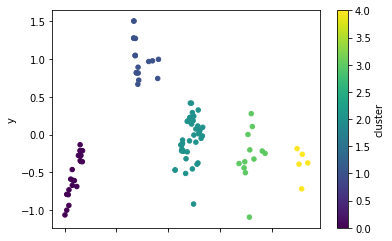

In [5]:
# import packages
from sklearn.decomposition import PCA

# initialize pca object with 2 components
pca = PCA(n_components=2, random_state=0)

# create 'x' and 'y' columns donoting observation locations in decomposed form
matrix['x'] = pca.fit_transform(matrix[matrix.columns[1:]])[:,0]
matrix['y'] = pca.fit_transform(matrix[matrix.columns[1:]])[:,1]

# dataframe to visualize clusters by customer names
clusters = matrix.iloc[:,[0,33,34,35]]

# visualize clusters
clusters.plot.scatter(x='x', y='y', c='cluster', colormap='viridis')
plt.show()

# Which cluster orders the most `Champagne`?
In this task you will be performing a set of data manipulation to bring data into the required form and then answer this question regarding Varietal feature: Which cluster orders the most Champagne?

In [6]:
# merge 'clusters' and 'transactions'
data = pd.merge(clusters, transactions)
print(data.head())
print('='*25)


# merge `data` and `offers`
data = pd.merge(offers, data)
print(data.head())
print('='*25)

# initialzie empty dictionary
champagne = {}

# iterate over every cluster
for val in data.cluster.unique():
    # observation falls in that cluster
    new_df = data[data.cluster == val]
    # sort cluster according to type of 'Varietal'
    counts = new_df['Varietal'].value_counts(ascending=False)
    # check if 'Champagne' is ordered mostly
    if counts.index[0] == 'Champagne':
        # add it to 'champagne'
        champagne[val] = (counts[0])

# get cluster with maximum orders of 'Champagne' 
cluster_champagne = max(champagne, key=champagne.get)

# print out cluster number
print("cluster with maximum orders of 'Champagne' : ",cluster_champagne)

  Customer Last Name  cluster         x         y  Offer #  n
0              Adams        0 -1.852539 -0.461418       18  1
1              Adams        0 -1.852539 -0.461418       29  1
2              Adams        0 -1.852539 -0.461418       30  1
3              Allen        2  0.482911  0.184745        9  1
4              Allen        2  0.482911  0.184745       27  1
   Offer # Campaign Varietal  Minimum Qty (kg)  Discount (%)  Origin  \
0        1  January   Malbec                72            56  France   
1        1  January   Malbec                72            56  France   
2        1  January   Malbec                72            56  France   
3        1  January   Malbec                72            56  France   
4        1  January   Malbec                72            56  France   

   Past Peak Customer Last Name  cluster         x         y  n  
0      False             Butler        3  1.480626 -0.358515  1  
1      False             Fisher        3  1.577292 -0.201546  1

# Which cluster of customers favours discounts more on an average?
In this task you will find the cluster which repsonds most to discounts so that the management can target them specifically for discounted pricing options.

In [7]:
# empty dictionary
discount = {} 

# iterate over cluster numbers
for val in data.cluster.unique():
    # dataframe for every cluster
    new_df = data[data.cluster == val]
    # average discount for cluster
    counts = new_df['Discount (%)'].values.sum() / len(new_df)
    # adding cluster number as key and average discount as value 
    discount[val] = counts

# cluster with maximum average discount
cluster_discount = max(discount, key=discount.get)
print("Cluster with maximum average discount : ",cluster_discount)

Cluster with maximum average discount :  4
